## Matt Sloane / ms9548

#### Homework 9 - Assignment 1 - Inclass Lab

In [79]:
# Import Modules
import pylab as pl
import os
import pandas as pd
import numpy as np
import re
from pandas.tools.plotting import scatter_matrix
%pylab inline

os.getenv("PUIDATA")

Populating the interactive namespace from numpy and matplotlib


'/home/cusp/ms9548/PUIdata'

In [27]:
# Download Data, Move to PUI Data, and Assign to Variables

def getdata():
    '''
    This function downloads the three data sets required for the assignment, moves them to the PUI Data directory
    '''
    
    os.system("mkdir " + os.getenv("PUIDATA") + "/Assignment8_Data")
    
    # Download Data
    os.system("curl -O http://cosmo.nyu.edu/~fb55/PUI2016/data/311_Service_Requests_from_2010_to_Present.csv")
    os.system("curl -O http://cosmo.nyu.edu/~fb55/PUI2016/data/Final_Demographics.csv")
    os.system("curl -O http://cosmo.nyu.edu/~fb55/PUI2016/data/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")
    
    # Move Data
    
    os.system("mv " + "311_Service_Requests_from_2010_to_Present.csv " + os.getenv("PUIDATA")+"/Assignment8_Data")
    os.system("mv " + "Final_Demographics.csv " + (os.getenv("PUIDATA")+"/Assignment8_Data"))
    os.system("mv " + "ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv " + os.getenv("PUIDATA")
              +"/Assignment8_Data")
    
    # Assign Data to DataFrames
   
    


    
getdata()
    

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2827: DtypeWarning: Columns (17,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [45]:
# Assign Data to Pandas DataFrames

# 311 Data
data_311 = pd.read_csv(os.getenv("PUIDATA") + "/Assignment8_Data/311_Service_Requests_from_2010_to_Present.csv")

# Demographic Data
cd_DemoData = pd.read_csv(os.getenv("PUIDATA") + "/Assignment8_Data/Final_Demographics.csv")

# Broadband Infrastructure Data
df_infr = pd.read_csv(os.getenv("PUIDATA") + 
                      "/Assignment8_Data/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
# Part 3 - Analyze / Clean / Format 311 Data
data_311.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [47]:
# Drop unnecessary columns

reduct_311 = data_311.drop(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Location Type', 'Incident Zip','Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type','City', 'Landmark', 'Facility Type', 'Status', 
       'Due Date', 'Resolution Description', 'Resolution Action Updated Date', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough', 'School Name', 'School Number', 
       'School Region', 'School Code', 'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint','Vehicle Type', 'Taxi Company Borough', 
       'Taxi Pick Up Location','Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 
       'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location'], axis = 1)

reduct_311.head(5)

,Complaint Type,Descriptor,Community Board,Borough
0,Noise - Residential,Loud Television,13 QUEENS,QUEENS
1,Blocked Driveway,No Access,12 BRONX,BRONX
2,Blocked Driveway,No Access,03 QUEENS,QUEENS
3,Blocked Driveway,No Access,12 BRONX,BRONX
4,Street Condition,Pothole,12 MANHATTAN,MANHATTAN


In [48]:
# Check if all Boroughs and Community Districts are represented in the Data
print (reduct_311['Community Board'].unique())
print (reduct_311['Borough'].unique())

['13 QUEENS' '12 BRONX' '03 QUEENS' '12 MANHATTAN' '09 MANHATTAN'
 '08 QUEENS' '01 QUEENS' '07 BRONX' '01 BROOKLYN' '03 MANHATTAN'
 '09 QUEENS' '05 BRONX' '03 BROOKLYN' '07 MANHATTAN' '12 BROOKLYN'
 '0 Unspecified' '09 BROOKLYN' '07 QUEENS' '15 BROOKLYN' '08 MANHATTAN'
 '10 BROOKLYN' '08 BROOKLYN' '04 MANHATTAN' '02 MANHATTAN' '12 QUEENS'
 '04 BRONX' '04 BROOKLYN' '01 BRONX' 'Unspecified MANHATTAN' '10 QUEENS'
 '18 BROOKLYN' '11 BROOKLYN' '10 MANHATTAN' '11 QUEENS' '16 BROOKLYN'
 '05 BROOKLYN' '05 MANHATTAN' '55 BROOKLYN' '08 BRONX' '09 BRONX'
 '17 BROOKLYN' '01 MANHATTAN' '05 QUEENS' '06 QUEENS' '02 BRONX' '11 BRONX'
 '04 QUEENS' 'Unspecified BROOKLYN' '02 QUEENS' '01 STATEN ISLAND'
 '03 STATEN ISLAND' '14 BROOKLYN' '07 BROOKLYN' '02 STATEN ISLAND'
 '10 BRONX' '11 MANHATTAN' '06 BROOKLYN' '13 BROOKLYN' '06 MANHATTAN'
 'Unspecified BRONX' '02 BROOKLYN' '06 BRONX' '14 QUEENS' '03 BRONX'
 '83 QUEENS' 'Unspecified QUEENS' 'Unspecified STATEN ISLAND' '80 QUEENS'
 '82 QUEENS' '81 QUEENS' '9

In [49]:
# How many unique values do we have? 
print (len(reduct_311['Community Board'].unique()))
print (len(reduct_311['Borough'].unique()))

74
6


In [50]:
# Deleting Invalid Data - Unspecified Values, Guidance / Code from:
# http://stackoverflow.com/questions/11350770/pandas-dataframe-select-by-partial-string
reduct_311 = reduct_311[reduct_311['Community Board'].str.contains('Unspecified') == False]
reduct_311 = reduct_311[reduct_311['Borough'].str.contains('Unspecified') == False]

In [51]:
print(len(reduct_311['Community Board'].unique()))
print(len(reduct_311['Borough'].unique()))

68
5


In [52]:
# Deleting Invalid Data - Non-Real Community Boards
reduct_311['Check'] = 'NaN'
groupby_311 = reduct_311.groupby(['Community Board'], as_index = False).count()
groupby_311

,Community Board,Complaint Type,Descriptor,Borough,Check
0,01 BRONX,280,273,280,280
1,01 BROOKLYN,791,776,791,791
2,01 MANHATTAN,353,313,353,353
3,01 QUEENS,687,675,687,687
4,01 STATEN ISLAND,659,653,659,659
5,02 BRONX,219,219,219,219
6,02 BROOKLYN,551,545,551,551
7,02 MANHATTAN,393,316,393,393
8,02 QUEENS,377,371,377,377
9,02 STATEN ISLAND,433,433,433,433


In [53]:
# Loop through rows, splitting Community Board values and converting the first value of the split to an interger,
# if higher than 18 (max # of community boards in any given borough), mark for deletion.
for x in range(0, len(groupby_311)):
        if int(groupby_311['Community Board'][x].split(' ')[0]) < 19:
            groupby_311['Check'][x] = 'Keep'
        else:
            groupby_311['Check'][x] = 'Delete'

            

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [54]:
# Remove those rows with Check = Delete
final_311 = groupby_311[groupby_311['Check'].str.contains('Delete') == False]
final_311

,Community Board,Complaint Type,Descriptor,Borough,Check
0,01 BRONX,280,273,280,Keep
1,01 BROOKLYN,791,776,791,Keep
2,01 MANHATTAN,353,313,353,Keep
3,01 QUEENS,687,675,687,Keep
4,01 STATEN ISLAND,659,653,659,Keep
5,02 BRONX,219,219,219,Keep
6,02 BROOKLYN,551,545,551,Keep
7,02 MANHATTAN,393,316,393,Keep
8,02 QUEENS,377,371,377,Keep
9,02 STATEN ISLAND,433,433,433,Keep


In [58]:
# Remove unnecessary columns and rank compaint data
final_311 = final_311.drop(['Descriptor', 'Borough', 'Check'], axis = 1)
final_311['Complaint Rank'] = final_311['Complaint Type'].rank(ascending = False)
final_311.rename(columns = {'Compaint Type' : 'Complaint Count'}, inplace = True)
final_311

,Community Board,Complaint Type,Complaint Rank
0,01 BRONX,280,57.0
1,01 BROOKLYN,791,8.0
2,01 MANHATTAN,353,52.0
3,01 QUEENS,687,14.0
4,01 STATEN ISLAND,659,17.0
5,02 BRONX,219,59.0
6,02 BROOKLYN,551,30.0
7,02 MANHATTAN,393,47.5
8,02 QUEENS,377,50.0
9,02 STATEN ISLAND,433,42.5


In [59]:
# Part 4 - Think about the interpretation of your results? - Demographic Data
cd_DemoData.columns

Index(['FIPS', 'cd_id', 'Total Population',
       'Population Density (per sq. mile)', '% Total Population: Male',
       '% Total Population: 18 to 24 Years',
       '% Total Population: 25 to 34 Years',
       '% Total Population: 35 to 44 Years',
       '% Population 5 Years And Over: Speak Only English',
       '% Population 5 Years And Over: Spanish or Spanish Creole',
       ...
       'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Production occupations',
       'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Transportation and material moving occupations',
       '% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations',
       '% Employed Civilian Population 16 Years And Over: Service occupations',
       '% Employed Civilian Population 16 Years And Over: Sales and office occupations',
       '% Employed Civ

In [60]:
# Reduce DataFrame
demo_Reduct = cd_DemoData[['cd_id', 'Total Population','Median household income (In 2014 Inflation Adjusted Dollars)']]
demo_Reduct

# Kept population data as a good reference / base data point, and income data as a potential comparison to 
# complaint data

,cd_id,Total Population,Median household income (In 2014 Inflation Adjusted Dollars)
0,BX08,106737,54224
1,BX12,134644,44906
2,BX10,121209,54962
3,BX11,135839,47910
4,BX03,172247,22041
5,BX06,172247,22041
6,BX07,135893,35495
7,BX05,132850,20872
8,BX04,141467,27203
9,BX09,190126,36058


In [61]:
# Clean / Format cd_id field for later merge

demo_Reduct['Borough'] = 'NaN'
demo_Reduct['CD_No'] = 'NaN'

for x in range(0, len(demo_Reduct)):
        if demo_Reduct['cd_id'][x][:2] == 'BX':
            demo_Reduct['Borough'][x] = 'BRONX'
            demo_Reduct['CD_No'][x] = demo_Reduct['cd_id'][x][-2:]
        elif demo_Reduct['cd_id'][x][:2] == 'BK':
            demo_Reduct['Borough'][x] = 'BROOKLYN'
            demo_Reduct['CD_No'][x] = demo_Reduct['cd_id'][x][-2:]
        elif demo_Reduct['cd_id'][x][:2] == 'MN':
            demo_Reduct['Borough'][x] = 'MANHATTAN'
            demo_Reduct['CD_No'][x] = demo_Reduct['cd_id'][x][-2:]
        elif demo_Reduct['cd_id'][x][:2] == 'QN':
            demo_Reduct['Borough'][x] = 'QUEENS'
            demo_Reduct['CD_No'][x] = demo_Reduct['cd_id'][x][-2:]
        elif demo_Reduct['cd_id'][x][:2] == 'SI':
            demo_Reduct['Borough'][x] = 'STATEN ISLAND'
            demo_Reduct['CD_No'][x] = demo_Reduct['cd_id'][x][-2:]

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://panda

In [63]:
# Concatenate new columns into new, merge compatible 
demo_Reduct['Community Board'] = 'NaN'
demo_Reduct['Community Board'] = demo_Reduct['CD_No'] + ' ' + demo_Reduct['Borough']
demo_Reduct

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,cd_id,Total Population,Median household income (In 2014 Inflation Adjusted Dollars),Borough,CD_No,Community Board
0,BX08,106737,54224,BRONX,08,08 BRONX
1,BX12,134644,44906,BRONX,12,12 BRONX
2,BX10,121209,54962,BRONX,10,10 BRONX
3,BX11,135839,47910,BRONX,11,11 BRONX
4,BX03,172247,22041,BRONX,03,03 BRONX
5,BX06,172247,22041,BRONX,06,06 BRONX
6,BX07,135893,35495,BRONX,07,07 BRONX
7,BX05,132850,20872,BRONX,05,05 BRONX
8,BX04,141467,27203,BRONX,04,04 BRONX
9,BX09,190126,36058,BRONX,09,09 BRONX


In [64]:
demo_Final = demo_Reduct.drop(['Borough', 'CD_No','cd_id'], axis = 1)
demo_Final

,Total Population,Median household income (In 2014 Inflation Adjusted Dollars),Community Board
0,106737,54224,08 BRONX
1,134644,44906,12 BRONX
2,121209,54962,10 BRONX
3,135839,47910,11 BRONX
4,172247,22041,03 BRONX
5,172247,22041,06 BRONX
6,135893,35495,07 BRONX
7,132850,20872,05 BRONX
8,141467,27203,04 BRONX
9,190126,36058,09 BRONX


In [65]:
# How many community districts are in file? 
print (len(demo_Final['Community Board'].unique()))

59


In [66]:
# Internet Infrastruct Data
df_infr.head(5)

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [67]:
# How many community districts are in file? 
print (len(df_infr['Qualifying Name'].unique()))

55


In [68]:
'''
There are only 55 unique records in the data, with some records representatve of two community districts. 
Clean / Edit Data for those records with 2 community boards in the qualifying name.  First record will be labeled
as the first community board only, second record will be labeled as the second community board only.  There are
4 such records - implementing the described operation will result in 59 unique records, one for each community board
'''

df_infr['Qualifying Name'][4] = 'NYC-Bronx Community District 3--Belmont, New York'
df_infr['Qualifying Name'][5] = 'NYC-Bronx Community District 6--Belmont, New York'
df_infr['Qualifying Name'][10] = 'NYC-Bronx Community District 1--Hunts Point, New York'
df_infr['Qualifying Name'][11] = 'NYC-Bronx Community District 2--Hunts Point, New York'
df_infr['Qualifying Name'][18] = 'NYC-Manhattan Community District 4--Chelsea, New York'
df_infr['Qualifying Name'][19] = 'NYC-Manhattan Community District 5--Chelsea, New York'
df_infr['Qualifying Name'][22] = 'NYC-Manhattan Community District 1--Battery Park City, New York'
df_infr['Qualifying Name'][23] = 'NYC-Manhattan Community District 2--Battery Park City, New York'

# View / Verify Edits
print (len(df_infr['Qualifying Name'].unique()))

59


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-package

In [84]:
# Clean CD Field for merge
# Guidance / Direction from the following source:
# http://stackoverflow.com/questions/4289331/python-extract-numbers-from-a-string


df_infr['Borough'] = 'NaN'
df_infr['CD_Temp'] = 'NaN'
df_infr['CD_No'] = 'Nan'
df_infr['Community Board'] = 'NaN'

for x in range(0,len(df_infr)):
    df_infr['CD_Temp'][x] = re.findall(r'\d+', df_infr['Qualifying Name'][x])  #find community district no. and assign
    df_infr['CD_No'][x] = df_infr['CD_Temp'][x][0] # convert list value to string value
    if df_infr['Qualifying Name'][x][8] == 'x':
        df_infr['Borough'][x] = 'BRONX'
    elif df_infr['Qualifying Name'][x][4] == 'M':
        df_infr['Borough'][x] = 'MANHATTAN'
    elif df_infr['Qualifying Name'][x][10] == 'y':
        df_infr['Borough'][x] = 'BROOKLYN'
    elif df_infr['Qualifying Name'][x][4] == 'Q':
        df_infr['Borough'][x] = 'QUEENS'
    elif df_infr['Qualifying Name'][x][4] == 'S':
        df_infr['Borough'][x] = 'STATEN ISLAND'

df_infr['Community Board'] = df_infr['CD_No'] + ' ' + df_infr['Borough']
df_infr

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packa

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer,Borough,CD_Temp,CD_No,Community Board,Low Connection,High Connection
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,404,30943,3701,6987,BRONX,[8],8,8 BRONX,21991,2329
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,178,31435,5087,8130,BRONX,[12],12,12 BRONX,19502,6799
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,158,32333,6209,8350,BRONX,[10],10,10 BRONX,21907,4046
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,122,31278,5837,7685,BRONX,[11],11,11 BRONX,19395,6050
4,3603705,79500US3603705,"NYC-Bronx Community District 3--Belmont, New York",57556,35503,88,1297,651,646,15847,...,88,33408,9080,14980,BRONX,[3],3,3 BRONX,17144,2249
5,3603705,79500US3603705,"NYC-Bronx Community District 6--Belmont, New York",57556,35503,88,1297,651,646,15847,...,88,33408,9080,14980,BRONX,[6],6,6 BRONX,17144,2249
6,3603706,79500US3603706,"NYC-Bronx Community District 7--Bedford Park, ...",47252,31468,0,1598,502,1096,18280,...,0,31021,7878,8353,BRONX,[7],7,7 BRONX,19878,3250
7,3603707,79500US3603707,NYC-Bronx Community District 5--Morris Heights...,44699,26332,54,956,352,604,11333,...,54,25772,8571,10302,BRONX,[5],5,5 BRONX,12289,548
8,3603708,79500US3603708,"NYC-Bronx Community District 4--Concourse, New...",47935,29376,316,301,73,228,14610,...,316,27971,6405,13243,BRONX,[4],4,4 BRONX,14911,1531
9,3603709,79500US3603709,"NYC-Bronx Community District 9--Castle Hill, N...",64011,45976,180,1536,296,1240,23999,...,180,45261,7631,10939,BRONX,[9],9,9 BRONX,25535,6983


In [85]:
# Assign High Connection and Low Connection Data Types (typology based on Kelsey Reid's / KDR276's approach)

connect_Low = df_infr.iloc[:,[6,9]]
connect_High = df_infr.iloc[:,[5,7,12]]

df_infr['Low Connection'] = connect_Low.sum(axis = 1)
df_infr['High Connection'] = connect_High.sum(axis = 1)

infr_Final = df_infr[['Community Board', 'Low Connection', 'High Connection']]
infr_Final.head(5)

,Community Board,Low Connection,High Connection
0,8 BRONX,21991,2329
1,12 BRONX,19502,6799
2,10 BRONX,21907,4046
3,11 BRONX,19395,6050
4,3 BRONX,17144,2249


In [86]:
# Part 5 - Merge the DataFrames on the Community Board Field
merge_Temp = pd.merge(final_311, demo_Final, on = ['Community Board'])
merge_Temp.head(5)

,Community Board,Complaint Type,Complaint Rank,Total Population,Median household income (In 2014 Inflation Adjusted Dollars)
0,01 BRONX,280,57.0,167147,21116
1,01 BROOKLYN,791,8.0,154713,57818
2,01 MANHATTAN,353,52.0,159903,120190
3,01 QUEENS,687,14.0,182860,56269
4,01 STATEN ISLAND,659,17.0,176338,57602


In [91]:
final_Data = pd.merge(merge_Temp, infr_Final, on = ['Community Board'])
final_Data['Complaint Count'] = final_Data['Complaint Type']
final_Data = final_Data.drop(['Complaint Type'], axis = 1)
final_Data.head(5)

,Community Board,Complaint Rank,Total Population,Median household income (In 2014 Inflation Adjusted Dollars),Low Connection,High Connection,Complaint Count
0,10 BRONX,47.5,121209,54962,21907,4046,393
1,10 BROOKLYN,37.0,128545,56696,22815,6703,474
2,10 MANHATTAN,13.0,132027,40564,26786,3285,693
3,10 QUEENS,11.0,134827,60946,14643,9675,719
4,11 BRONX,36.0,135839,47910,19395,6050,480


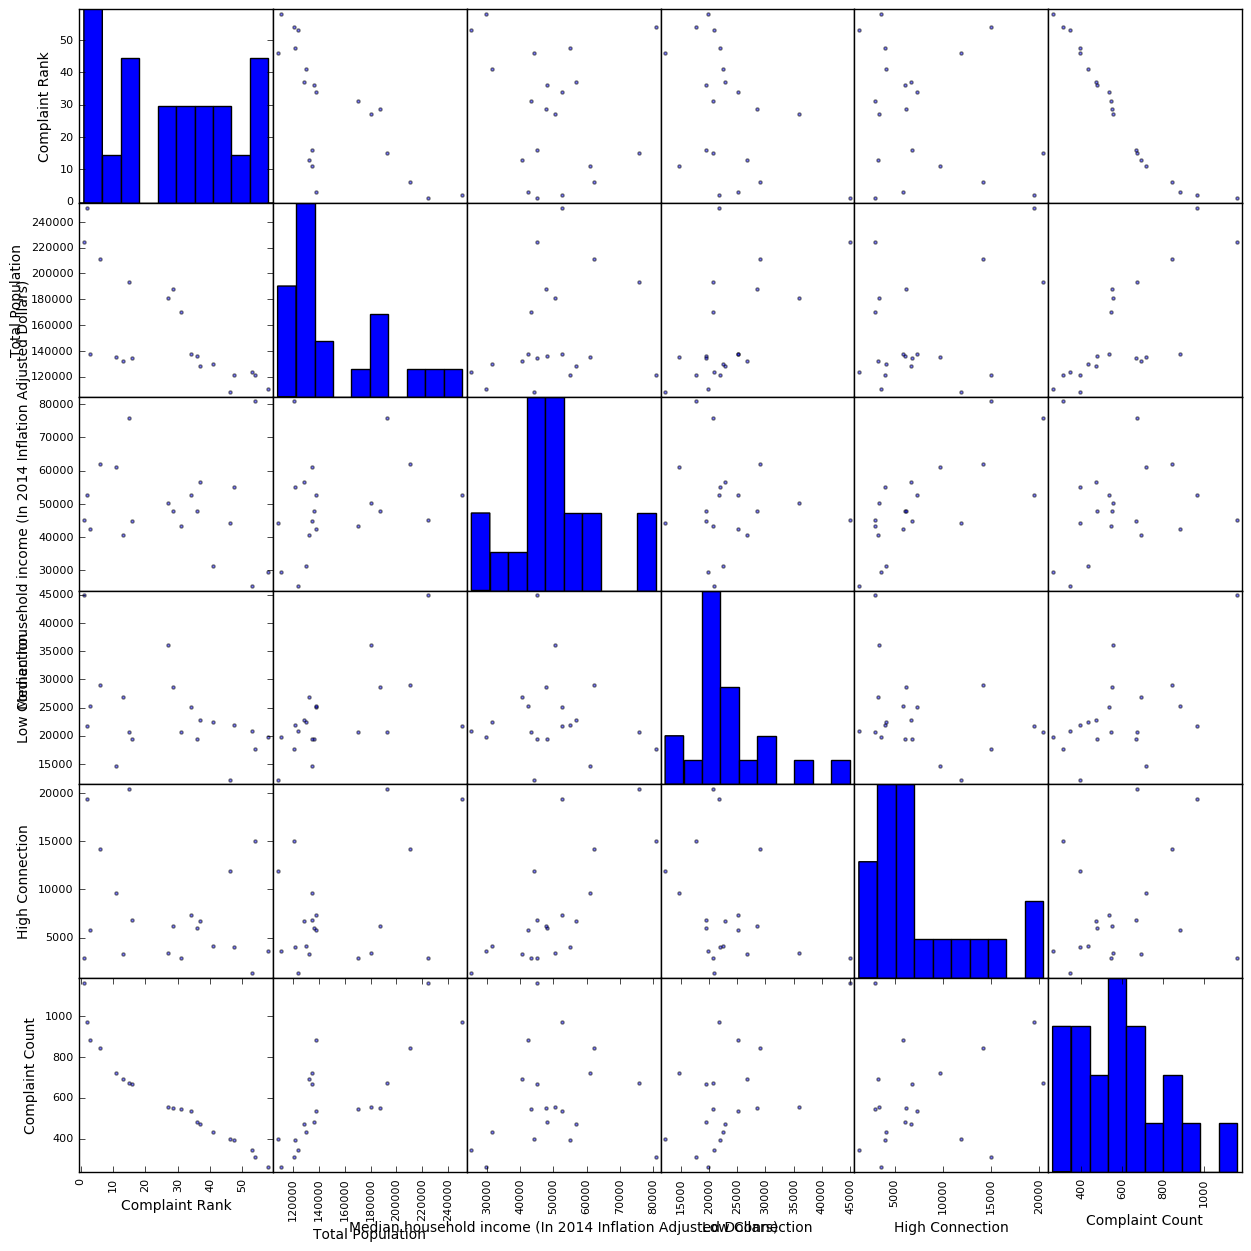

In [92]:
fig = pd.scatter_matrix(final_Data, figsize = (15,15))

### This scatter plot shows the relationship between variables in the final, merged data (was running out of time and could not find how to adjust the scatter plot text size and positon to make the axis labels more legible).  Relationships of note in the graph above include (1) that between the complaint count and a "high" internet connection (potential linear increase) and (2) median income and complaint count, indicating a potential relationship between wealthier communities and the likelihood of complaint (which shouldn't be surprising).